# Fifa World Championship

----

## Preparing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [18]:
# dataset = pd.read_csv(<PATH>)
dataset = pd.read_csv('../../DataSets/FIFA_World_Cup_1558_23.csv')

In [19]:
dataset.head()

,Unnamed: 0,Year,Datetime,Stage,Stadium,City,Home.Team.Name,Home.Team.Goals,Away.Team.Goals,Away.Team.Name,...,Attendance,Half.time.Home.Goals,Half.time.Away.Goals,Referee,Assistant.1,Assistant.2,RoundID,MatchID,Home.Team.Initials,Away.Team.Initials
0,1,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,...,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,2,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,...,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,3,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,...,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,4,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,...,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,5,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,...,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [24]:
dataset = dataset[[dataset.columns[1]] + list(dataset.columns[6:10])].copy()
dataset

,Year,Home.Team.Name,Home.Team.Goals,Away.Team.Goals,Away.Team.Name
0,1930,France,4,1,Mexico
1,1930,USA,3,0,Belgium
2,1930,Yugoslavia,2,1,Brazil
3,1930,Romania,3,1,Peru
4,1930,Argentina,1,0,France
...,...,...,...,...,...
845,2014,Netherlands,0,0,Costa Rica
846,2014,Brazil,1,7,Germany
847,2014,Netherlands,0,0,Argentina
848,2014,Brazil,0,3,Netherlands


In [25]:
# Transoforming all data into numeric
from sklearn.preprocessing import LabelEncoder
n_columns = dataset.shape[1]
columns = dataset.columns[1::]
encoders = [ LabelEncoder() for _ in range(n_columns - 1)]

prepross_data = dataset.copy()

i = 0
for column in columns:
    prepross_data[column] = encoders[i].fit_transform(dataset[column])
    i += 1
    
prepross_data

,Year,Home.Team.Name,Home.Team.Goals,Away.Team.Goals,Away.Team.Name
0,1930,23,4,1,45
1,1930,67,3,0,5
2,1930,71,2,1,7
3,1930,51,3,1,53
4,1930,2,1,0,26
...,...,...,...,...,...
845,2014,42,0,0,14
846,2014,7,1,6,28
847,2014,42,0,0,2
848,2014,7,0,3,47


## Training model

In [26]:
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.model_selection as training
import sklearn.metrics as metrics
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer

In [39]:
X = prepross_data.iloc[:, 1:].values
X

array([[23,  4,  1, 45,  3],
       [67,  3,  0,  5,  3],
       [71,  2,  1,  7,  3],
       ...,
       [42,  0,  0,  2,  2],
       [ 7,  0,  3, 47,  0],
       [25,  1,  0,  2,  2]], dtype=int64)

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

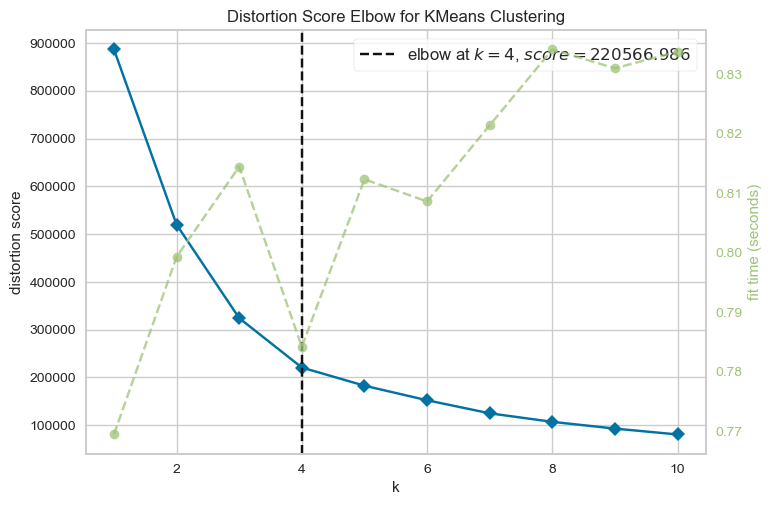

In [40]:

kmeans = cluster.KMeans()
visualizer = KElbowVisualizer(kmeans, k = (1, 11))
visualizer.fit(X)
visualizer.show()
plt.show()

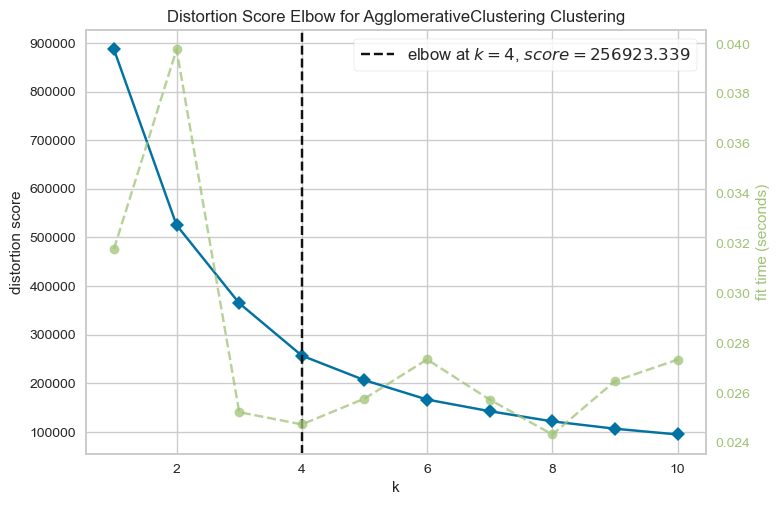

In [41]:
hc  = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(hc, k = (1, 11))
visualizer.fit(X)
visualizer.show()
plt.show()

In [81]:
n_clus = 4

kmeans = cluster.KMeans(n_clusters = n_clus)
y_kmeans = kmeans.fit_predict(X)

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [82]:
hc = cluster.AgglomerativeClustering(n_clusters = n_clus)
y_hc = hc.fit_predict(X)

In [83]:
prepross_data['Label'] = y_kmeans
prepross_data.head()


,Year,Home.Team.Name,Home.Team.Goals,Away.Team.Goals,Away.Team.Name,Label
0,1930,23,4,1,45,2
1,1930,67,3,0,5,3
2,1930,71,2,1,7,3
3,1930,51,3,1,53,1
4,1930,2,1,0,26,0


## Metrics

In [84]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [85]:
# Best : near 1;  Worst: near -1;   Overlapping: near 0
silhoutte_kmeans = silhouette_score(X, y_kmeans)

silhoutte_hc = silhouette_score(X, y_hc)

print('silhoutte kmeans :', silhoutte_kmeans)
print('silhoutte hc', silhoutte_hc)

silhoutte kmeans : 0.4055160858396047
silhoutte hc 0.31429998596997766


In [86]:

calinski_harabasz_kmeans = calinski_harabasz_score(X, y_kmeans)

calinski_harabasz_hc = calinski_harabasz_score(X, y_hc)

print('calinski harabasz kmeans:', calinski_harabasz_kmeans)
print('calinski harabasz hc', calinski_harabasz_hc)

calinski harabasz kmeans: 853.9749171748991
calinski harabasz hc 585.1117261118305


Fuck it didnot work

## Applying PCA

In [37]:
from sklearn.model_selection import train_test_split

In [51]:
# Define x and y
X = prepross_data.iloc[:, 1:].values
y = prepross_data.iloc[:, 1].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)
X_train

array([[65,  3,  1, 45,  0],
       [35,  1,  1,  2,  1],
       [ 7,  4,  1, 39,  2],
       ...,
       [25,  1,  0, 52,  2],
       [67,  0,  1, 76,  0],
       [17,  0,  2, 39,  2]], dtype=int64)

In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train

array([[ 1.43303335,  0.72792911,  0.00281943,  0.2393822 , -1.41166066],
       [ 0.05926078, -0.4972981 ,  0.00281943, -1.553991  , -0.48598154],
       [-1.22292696,  1.34054272,  0.00281943, -0.01085592,  0.43969758],
       ...,
       [-0.39866341, -0.4972981 , -0.95578697,  0.53132668,  0.43969758],
       [ 1.52461819, -1.10991171,  0.00281943,  1.53227916, -1.41166066],
       [-0.76500277, -1.10991171,  0.96142583, -0.01085592,  0.43969758]])

In [58]:
from sklearn.decomposition import PCA
# El profe de las 14-d quiere solo 2-d
pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
X_train

array([[ 1.93427037,  0.29758273],
       [ 0.02825426,  1.00797232],
       [-1.22629015, -0.16207471],
       ...,
       [-0.4141782 , -1.16315869],
       [ 2.47978073, -0.77152041],
       [-0.69896246,  0.31797931]])

### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_logistic_regression = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test, y_logistic_regression)
acc = accuracy_score(y_test, y_logistic_regression)

print("Confusion Matrix: ")
print(cm)

print("Accuracy")

print(acc)

Confusion Matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy
0.12941176470588237


### K-means

In [87]:
n_clus = 4

kmeans = cluster.KMeans(n_clusters = n_clus)
kmeans.fit(X_train, y_train)

C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MrJel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4)

In [94]:
y_kmeans = kmeans.predict(X_test)
cm = confusion_matrix(y_test, y_kmeans)
acc = accuracy_score(y_test, y_kmeans)

print("Confusion Matrix: ")
print(cm)

print("Accuracy")

print(acc)


Confusion Matrix: 
[[ 2  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [13  0  0 ...  0  0  0]
 ...
 [ 0  4  0 ...  0  0  0]
 [ 0  2  1 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]]
Accuracy
0.01764705882352941


In [89]:
silhoutte_kmeans = silhouette_score(X_test, y_kmeans)
print('silhoutte kmeans :', silhoutte_kmeans)


silhoutte kmeans : 0.2639269668082426


In [91]:

calinski_harabasz_kmeans = calinski_harabasz_score(X_test, y_kmeans)

print('calinski harabasz kmeans:', calinski_harabasz_kmeans)

calinski harabasz kmeans: 99.40947649179942


In [ ]:
centroids = 